# 8장 자연어 처리 시작하기

* 설치 목록
    * JDK (Java SE Downloads)
    * JAVA_HOME 설정
    * JPype 설치
    * KoNLPy 설치
    * Word Cloud 설치
* **까뮈의 페스트**를 WordCloud로 본다면?

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치
* 자연어 처리 <br>
  [사이트 참조_박은정](https://github.com/e9t?tab=repositories)<br>
  [자연어 처리](https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=NPAP12013363&dbt=NPAP) <br>
  [꼬꼬마](http://kkma.snu.ac.kr/documents/)<br>
  [CountVectorizer, TdifVectorizer](https://settlelib.tistory.com/62)
  
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA_HOME 설정 : 교재내용 참조
* JPype1 : 
    * 사용하는 OS버전의 파이썬 버전에 의존적이니, 아래 사이트에서 맞는 버전을 다운로드 후 아나콘다 설치경로에 복사 [C:/anaconda3/]
    * [비공식 다운로드 사이트](https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
    * 설치 방법 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* **install konlpy** <br>
(base) C:\WINDOWS\system32>pip install konlpy

* (base) C:\WINDOWS\system32>python<br>
  **import nltk --> nltk.download()**
* anaconda Promtp 관리자 권한으로 실행<br>
  -> python -> import nltk --> nltk.download() --> stopwords, punk를 더블클릭하거나 다운로드 버튼 클릭
* (base) C:\WINDOWS\system32>python<br>
  **pip install wordcloud**
* (base) C:\WINDOWS\system32>python<br>
  **pip install gensim** 하다가, 오류가 나면 pip install -U setuptools

## 8-2. 한글 자연어 처리 기초

### 꼬꼬마

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
kkma.sentences("한국어 분석을 시작합니다. 재미있어요~")

In [ ]:
kkma.nouns("한국어 분석을 시작합니다. 재미있어요~")

In [ ]:
# POS(Part Of Speech)한글 형태소 품사 
kkma.pos("한국어 분석을 시작 합니다. 재미있어요~")

### 한나눔

In [ ]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [ ]:
hannanum.nouns("한국어 분석을 시작합니다. 재미있어요~")

In [ ]:
hannanum.morphs("한국어 분석을 시작합니다 재미있어요~~")

In [ ]:
hannanum.pos("한국어 분석을 시작합니다 재미있어요~~")

### 트위터 분석기

In [ ]:
# 트위터 분석기
from konlpy.tag import Okt
t = Okt()

In [ ]:
t.nouns("한국어 분석을 시작합니다 재미있어요~~")

In [ ]:
t.morphs("한국어 분석을 시작합니다 재미있어요~~")

In [ ]:
t.pos("한국어 분석을 시작합니다 재미있어요~~")

# 워드 클라우드 
* word cloud설치: `pip install wordcloud`

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image  #Python Image Library`

In [ ]:
text = open("../data/09. alice.txt").read()
type(text)
text

In [ ]:
suggest_party = pd.read_csv("../data/open/suggest_party.csv")

In [ ]:
alice_mask = np.array(Image.open("../data/09. alice_mask.png"))
type(alice_mask), alice_mask.shape, alice_mask

In [ ]:
stopwords = set(STOPWORDS) #불용어 - 통계에서 빠지는 단어
stopwords.add("said")

In [ ]:
import platform
import matplotlib.pyplot as plt
# 한글 폰트 설치 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.figure(figsize =(8, 8))
plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wc = WordCloud(background_color='white',max_words = 2000, mask = alice_mask, stopwords = stopwords)
wc = wc.generate(text)
wc.words_

In [ ]:
plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
text = open("../data/07. a_new_hope.txt").read()

text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

mask = np.array(Image.open("../data/09. stormtrooper_mask.png"))

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [ ]:
wc = WordCloud(max_words = 1000, mask = mask, stopwords= stopwords,
              margin = 10, random_state = 1).generate(text)
default_colors = wc.to_array()
wc.words_

In [ ]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)  # hsl 색상, 채도 , 명도
# https://www.w3schools.com/colors/colors_hsl.asp

In [ ]:
plt.figure(figsize = (12, 12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state = 3),
          interpolation = 'bilinear')
plt.axis('off')  # 축 없애고,
plt.show()

## 육아휴직관련 법안 1809890호 

In [ ]:
import nltk

In [ ]:
from konlpy.corpus import kobill
doc_ko = kobill.open("1809890.txt").read()

In [ ]:
files_ko = kobill.fileids()
files_ko

In [ ]:
type(doc_ko), len(doc_ko)

In [ ]:
from konlpy.tag import Twitter
t = Twitter()
# print(type(doc_ko), doc_ko)
tokens_ko = t.nouns(doc_ko)  # 트위터 분석기를 이용해 명사만을 추출
tokens_ko

In [ ]:
ko = nltk.Text(tokens_ko)
ko

In [ ]:
print(len(ko.tokens))  # 수집된 단어의 수
print(len(set(ko.tokens)))  #  고유한 토큰의 갯수 
ko.vocab()   # 단어의 빈도수

#dir(ko.vocab())  # 딕셔너리 

In [ ]:
plt.figure(figsize = (12, 6))
ko.plot(50)
plt.show()

In [ ]:
# 불용어에 단어 추가 
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

In [ ]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [ ]:
ko.count('초등학교')  # `초등학교`라는 단어의 빈도

In [ ]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])  # 단어내 문서의 위치

In [ ]:
ko.concordance('초등학교')  # `초등학교`라는 단어와 매칭되는 것들을 추출.

In [ ]:
ko.concordance_list('초등학교')

In [ ]:
ko.collocations(num = 100)  # 문장내에서 연이어 나타나

In [ ]:
data = ko.vocab().most_common(150)  # list객체로 반환

wordcloud  = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.5,  # 빈도가 많은 단어가 더 강조됨
                      background_color = 'white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 퀴즈
워드크라우드
1. kor_keyw의 주요 키워드를 시각화 해 보세요.

1) 워드크라우드로 표현

2) 빈도수 표현

결과물만 첨부하세요.

2. eng_keyw영문 키워드도 분석해 보세요

## 1.kor_keyw의 주요 키워드 분석 및 시각화

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Twitter

In [ ]:
text = open("../data/kor_keyw.txt", encoding = 'utf-8').read()
t = Twitter()
kor_nouns = t.nouns(text)
kor_text = nltk.Text(kor_nouns)

plt.figure(figsize = (10, 5))
kor_text.plot(50)
plt.show()
plt.tight_layout()

### WordCloud

In [ ]:
ko_data = kor_text.vocab().most_common(150)  # list객체로 반환

wordcloud  = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,  # 빈도가 많은 단어가 더 강조됨
                      background_color = 'white').generate_from_frequencies(dict(ko_data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 2.eng_keyw의 주요 키워드 분석 및 시각화

In [ ]:
eng_text = open("../data/eng_keyw.txt", mode='r').read()

wc = WordCloud(background_color='white',max_words = 2000,stopwords = stopwords)
wc = wc.generate(eng_text)

wc.words_

plt.figure(figsize = (12, 12))
plt.imshow(wc.recolor(random_state = 3, colormap= 'Paired_r'),
          interpolation = 'bilinear')
plt.axis('off')  # 축 없애고,
plt.show()

## 5.Naive Bayes Classifier의 이해 - 영문

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [ ]:
all_words = set(word.lower() for sentences in train 
               for word in word_tokenize(sentences[0]))
all_words

In [ ]:
a = train[0]
a

In [ ]:
# 말뭉치를 만드는 것임.
all_words = set()
for sentences in train:
    for word in word_tokenize(sentences[0]):        
        all_words.add(word.lower())            
all_words        

In [ ]:
# 문장내에 존재하는지 여부를 True혹은 False로 리턴 
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

In [ ]:
test_sentences = "i like MeRui"
test_sent_feature = {word.lower():
                      (word in word_tokenize(test_sentences.lower()))
                      for word in all_words}
test_sent_feature

In [ ]:
test_sentences = "I dislike you"
test_sent_feature = {word.lower():
                      (word in word_tokenize(test_sentences.lower()))
                      for word in all_words}
test_sent_feature

In [ ]:
classifier.classify(test_sent_feature)

## 8-6. Naive Bayes Classifier의 이해 - 한글
* 스팸 메일 필터링 등과 같이 문자열을 토큰화해서 표를 부착하는 것.(표는 특정의미를 갖는다.)

In [ ]:
from konlpy.tag import Twitter

In [ ]:
pos_tagger = Twitter()

In [ ]:
train = [('메리가 좋아', 'pos'),
        ('고양기 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')
        ]

In [ ]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

In [ ]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

In [ ]:
# 
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [ ]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

In [ ]:
classifier.classify(test_sent_features)

### 한글은 형태소 분석이 필요하다.  ==> 메리가, 메리랑 , 메리는 

In [ ]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [ ]:
from konlpy.tag import Twitter
twitter = Twitter()
print(twitter.pos('이것도 재미 있습니당ㅋㅋㅋㅋ'))

In [ ]:
# norm = True : 토큰을 정규화, 있습니당ㅋㅋㅋ => 있습니다.:현대적인 말로 바꾸어 줍니다.
print(twitter.pos('이것도 재미 있습니당ㅋㅋㅋㅋ', norm = True))

In [ ]:
# norm = True : 토큰을 정규화, 있습니당ㅋㅋㅋ => 있습니다.:현대적인 말로 바꾸어 줍니다.
# stem = True
print(twitter.pos('이것도 재미 있습니당ㅋㅋㅋㅋ', norm = True, stem = True))

In [ ]:
for row in train:
    print(row[0], row[1])

In [ ]:
print(train)
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

In [ ]:
tokens = [t for d in train_docs for t in d[0]]
tokens

In [ ]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [ ]:
train_xy = [(term_exists(d), c) for d, c in train_docs]
train_xy

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [ ]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [ ]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

In [ ]:
classifier.show_most_informative_features()

In [ ]:
test_sent_features = {word: (word in tokens) for wod in test_docs}
test_sent_features

In [ ]:
# 한글 형태소 분석을 거친후 
# "난 수업이 마치면 메리아 놀거야" 문장을 긍정문(pos)으로 인식함
classifier.classify(test_sent_features)

## 8.7 문장의 유사도 측정하기

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df = 1)# 단어장에 포함되기 위한 최소 빈도

In [ ]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [ ]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

In [ ]:
X.toarray()

In [ ]:
X.toarray().transpose()

In [ ]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

In [ ]:
new_post = ['메리랑 공원에서 걷고 싶어']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

In [ ]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())  #벡터의 길이를 계산

In [ ]:
# new_post= ['메리랑 공원에서 걷고 싶어']
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    print(post_vec)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    #print(d, best_dist)
    # 아래는 필요없는 로직인것 같음.
    #if d<best_dist:  # bubble sort        
     #   best_dist = d
     #   best_i = i

In [ ]:
#트위터 분석기로 형태소 분석을 하고 다시 보자
#말뭉치 사전을 만듦
from konlpy.tag import Twitter
t = Twitter()

In [ ]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

In [ ]:
content_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence += ' '+ word
    content_for_vectorize.append(sentence)

content_for_vectorize

In [ ]:
X = vectorizer.fit_transform(content_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

In [ ]:
vectorizer.get_feature_names()

In [ ]:
X.toarray()

In [ ]:
X.toarray().transpose()

In [ ]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

In [ ]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [ ]:
new_post_vec.toarray()

In [ ]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist: # 교환 알고리즘.
        best_dist = d
        best_i = i

In [ ]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

In [ ]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

1.sparcity - 무수히 많은 0 - 계산량도 높아지고, 사용량도 많아진다.<br>
2.출현빈도가 높은 단어는 힘이 세진다.<br>
3.단어의 순서를 무시한다.<br>
4.오타나 줄임말 처리를 못한다.

In [ ]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [ ]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

In [ ]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

### TfidVectorizer

In [ ]:
# TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도 -역문서 빈도
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

#### TF : 문서가 주어졌을때 단어가 출현한 횟수 ==> 출현 횟수 / 총 단어의 갯수
#### IDF : 총 문서/ 단어를 포함한 문서

In [ ]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D)) # 1/3, sp.log(3 / 1)

In [ ]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [ ]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

In [ ]:
vectorizer.get_feature_names()

In [ ]:
#new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

In [ ]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [ ]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

## 8.8 여자 친구 선물 고르기 

In [ ]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() =="Darwin":
    rc('font', family = 'AppleGothic')
else:
    print('Unknow system : ')
    
plt.rcParams['axes.unicode_minus'] = False    

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [ ]:
tmp1 = 'https://kin.naver.com/search/list.nhn?where=kin'
html = tmp1 + '&query={key_word}&page={num}'

In [ ]:
# 테스트삼아 한페이지만 가져옴
response = urlopen(html.format(num=1,key_word=urllib.parse.quote('아내 선물')))
soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
tmp_list

In [ ]:
from tqdm import tqdm_notebook


present_candi_txt = []

for n in tqdm_notebook(range(1, 1000, 10)):
    resp = urlopen(html.format(num=n,
                               key_word=urllib.parse.quote('아내 선물')))
    soup = BeautifulSoup(resp, "html.parser")
    tmp  = soup.find_all('dl')
    
    for line in tmp:
        present_candi_txt.append(line.text)
    time.sleep(0.5)    

In [ ]:
present_candi_txt

In [ ]:
import nltk
import re
from konlpy.tag import Twitter; t = Twitter()

In [ ]:
def clean_text(data):
    pattern = '[^\w|\s|\n|\t]'
    repl = ''
    text = re.sub(pattern, repl, data)
    pattern = '<[^>]*>.'
    repl = ''
    text = re.sub(pattern, repl, data)
    pattern = '([ㄱ-ㅎㅏㅡㅣ]+)'
    repl = ''
    text =  re.sub(pattern, repl, data)
    return text

In [ ]:
# 하나의 문자열로 변수에 할당
present_text = ""
for each_line in present_candi_txt[:10000]:
    present_text += clean_text(each_line.replace('\t','').replace('\n', '')) +"\n"

In [ ]:
present_text

In [ ]:
# 말뭉치로 짤라냄
tokens_ko = t.morphs(present_text)  # 리스트로 반환
# type(tokens_ko)
#tokens_ko

In [ ]:
ko = nltk.Text(tokens_ko, name='아내 선물')
#print(len(ko.tokens))
#print(len(set(ko.tokens)))

In [ ]:
ko.vocab().most_common(100)  # 가장 많이 나온 단어 100개만 추출

In [ ]:
stop_words = [('선물', 309),
 ('아내', 235),
 ('.', 235),
('ㅠㅠ',50),              
 ('수', 228),
 ('추천', 162),
 ('...', 153),
 ('답변', 150),
 ('|', 146),
 ('&', 112),
 ('>', 111),
 ('A', 110),
 ('\xa0', 110),
 ('\n', 110),
 ('Q', 103),
 (',', 102),
 ('을', 96),
 ('가', 92),
 ('이', 91),
 ('#', 90),
 ('0', 79),
 ('....', 64),
 ('1', 58),
 ('로', 57),
 ('에', 56),
 ('를', 49),
 ('에게', 46),
 ('한', 44),
 ('?', 33),
 ('가족', 32),
 ('대', 31),
 ('분', 31),
 ('의', 31),
 ('도', 28),
 ('2', 26),
 ('은', 24),
 ('좋은', 23),
 ('으로', 23),
 ('여자', 23),
 ('것', 22),
 ('뭐', 21),
 ('(', 21),
 ('****', 21),
 ('와이프', 21),
 ('30', 20),
 ('!', 20),
 ('좀', 20),
 ('합니다', 20),
 ('제', 20),
 ('어떤', 19),
 ('는', 19),
 ('4', 19),
 ('저', 18),
 ('3', 18),
 ('요', 17),
 ('이나', 15),
 ('****)', 15),
 ('하고', 15),
 ('들', 14),
 ('5', 14),
 ('해주세요', 14),
 ('..', 14),
 ('기념일', 14),
 ('좋을까요', 14),
 ('만', 13),
 ('감동', 13),
 ('할', 13),
 ('하는데', 13),
 ('많이', 12),
 ('연애', 12),
 ('남편', 12),
 ('이번', 12),
 ('적', 11),
 ('에서', 11),
 ('있는', 11),
 ('이라', 11),
 ('생각', 11),
 ('싶은데', 11),
 ('한테', 11),
 ('어떤게', 11),
 ('~', 10),
 ('10', 10),
 ('거', 10),
 ('7', 10),
 ('특별한', 10),
 ('14', 10),
 ('고민', 10),
 ('해', 10),
 ('인데', 10),
 ('날', 10),
 ('인', 9),
 ('잘', 9),
 ('께서', 8),
 ('고', 8),
 ('그래서', 7),
 ('조금', 7),
 ('드립니다', 7),
 ('06', 7),
 ('해서', 7),
 ('너무', 7),
 ('해주고', 7),
 ('다', 7),
 ('주년', 7),
 ('부탁', 7),
 ('하나', 7),
 ('좋을지', 7),
 ('부탁드립니다', 7),
 ('요즘', 7),
 ('후', 7),
 ('꿈', 7),
 ('때', 7),
 ('부부', 7),
 ('와', 7),
 ('40', 7),
 ('전', 7),
 ('더', 6),
('저희', 8),
 ('입니다', 8),
 ('하는', 8),
 ('과', 8),
 ('축하', 8),
 ('하려고', 8),
 ('좋아할만', 6),
 ('께', 6),
 ('보', 6),
 ('니까', 6),
 ('걸', 6),
 ('해야', 6),
 ('있을까요', 6),
 ('있어요', 6),
 ('못', 6),
 ('위해', 6),
 ('2020.05', 6),
 ('07', 6),
 ('곧', 6),
 ('준비', 6),
 ('05', 6),
 ('주', 6),
 ('님', 6),
 ('01', 6),
 ('주고', 6),
 ('번', 6),
 ('정도', 6),
 ('뭔가', 6),
 ('13', 6),
 ('드려요', 5),
 ('^^', 5),
 ('직장', 5),
 ('12', 5),
 ('09', 5),
 ('사주고', 5),
 ('싶어요', 5),
 ('두', 5),
 ('다른', 5),
('사람과', 6),
 ('그룹', 6),
 ('이라고', 6),
 ('제작', 6),
 ('그', 6),
 ('led', 6),
 ('함께', 6),
 ('22', 5),
 ('위', 5),
 ('한번', 5),
 ('안녕하세요', 5),
('줄', 5),
 ('도움', 5),
 ('이제', 5),
 ('6', 5),
 ('맞는', 5),
 ('그리고', 5),
 ('사랑', 5),
 ('예쁜', 5),
 ('정말', 5),
 ('28', 5),
('2020.10', 4),
 ('게', 4),
 ('11', 4),
 (')', 4),
 ('알아보고', 4),
 ('않고', 4),
 ('했는데', 4),
 ('??', 4),
 ('27', 4),
 ('뭘', 4),
 ('해주면', 4),
 ('그런', 4),
 ('도와주세요', 4),
 ('하는데요', 4),
('50', 5),
 ('효과', 5),
 ('03', 5),
 ('고생', 4),
 ('올해', 4),
 ('24', 4),
 ('라', 4),
 ('항상', 4),
 ('08', 4),
 ('나', 4),
 ('처음', 4),
 ('백', 4),
 ('구', 4)
             ]

In [ ]:
stop_words = [word[0] for idx, word in enumerate(stop_words)]

In [ ]:
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(40)

### 등장빈도에 따른 빈도수 그래프 그리기

In [ ]:
plt.figure(figsize = (15, 6))
ko.plot(40)
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
data = ko.vocab().most_common(100)

### 일반적인 워드 클라우드 

In [ ]:
# font_path = "/Library/Fonts/AppleGothic.ttf",
wordcloud = WordCloud(font_path = "c:/Windows/Fonts/malgun.ttf",
                     relative_scaling = 0.5,
                     stopwords=STOPWORDS,
                     background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 이미지에 워드 클라우드 

In [ ]:
mask = np.array(Image.open("../data/09. heart.jpg"))
from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

# font_path = "/Library/Fonts/AppleGothic.ttf",
wordcloud = WordCloud(font_path = "c:/Windows/Fonts/malgun.ttf",
                     relative_scaling = 0.1,
                     mask = mask,
                     stopwords=STOPWORDS,
                     background_color='white',
                     min_font_size = 1,
                     max_font_size = 100
                     ).generate_from_frequencies(dict(data))
# 그리기 
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

### Word2Vec을 활용한 처리

In [ ]:
import gensim
from gensim.models import word2vec

In [ ]:
twitter = Twitter()
results = []
lines = present_candi_txt

for line in lines:
    malist = twitter.pos(line, norm = True, stem = True)
    r = []
    
    for word in malist:
        #print(word)
        if not word[1] in ["Foreign", "Number", "Modifier", "Punctuation", "Number", "Adverb", "Adjective", "Suffix", "Josa", "Alpha", "Eomi",
                          "Hashtag", "VerbPrefix"]:
            r.append(word[0])
    r1 = (" ".join(r)).strip()
    results.append(r1) 

In [ ]:
data_file = "pres_wife.data"

with open(data_file,mode = 'w', encoding = 'utf-8') as f:
    f.write("\n".join(results))

### 저장한 키워드정보를 다시 읽어드린다.

* `word2vec.LineSentence(source, max_sentence_length=10000, limit=None)`
* 인자가 되는 source는 공백으로 구분되어 전처리가 되어 있어야 함.

In [ ]:
keywords = word2vec.LineSentence(data_file)
# type(keywords), dir(keywords)

model = word2vec.Word2Vec(keywords, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)
model.save("pres_wife.model")

#### 생성한 모델을 읽음

In [ ]:
model = word2vec.Word2Vec.load("pres_wife.model")

In [ ]:
type(model), dir(model)

In [ ]:
model.most_similar(positive=['선물'])

In [ ]:
model.most_similar(positive=['아내'])

In [ ]:
model.most_similar(positive=['화장품', '현금', '쇼핑'])

In [ ]:
model.most_similar(positive=['화장품', '현금', '쇼핑', '목걸이'])

## 법안에 대한 word2vec

In [62]:
import seaborn as sns
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [14]:
import pandas as pd
df = pd.read_csv("../data/open/suggest_party.csv")

In [144]:
dp = ('더불어민주당', '열린민주당')
op = ('국민의힘', '정의당', '시대전환', '무소속', '국민의당', '기본소득당')

In [15]:
billWord = df.loc[(df['AGE']== 21) & (df['BILL_WORD'].notna()), 'BILL_WORD']

In [149]:
billWord_dp = df.loc[(df['AGE']== 21) & (df['BILL_WORD'].notna()) & (df['PART_NAME'].isin(dp)), 'BILL_WORD']
billWord_dp

0       독점규제 공정거래 법률 공정거래법 시장경제 기본규칙 제정 이후 공정 거래질서 확립 ...
1       현행법 지방교육재정교부금 재원 내국세 총액 담배 개별소비세 등을 제외 금액 교육세 ...
2       현행법 농업기계 제조 수입업자 용도 기계 구분 명확히 농업인 알권리 보장 제조 수입...
3       현행 소방공무원 국가직 전환 이후 소방안전교부세율 담배 부과 개별소비세 소방안전교부...
4       현행법 식품접객업 집단급식소 대통령령 영업소 집단급식소 설치 운영 대통령령 농수산물...
                              ...                        
4154    고위공직자범죄수사처 설치 고위공직자범죄수사처 인사청문회 임명하도 내용 고위공직자범죄...
4155    폐기물 재활용업 목재 합성수지 플라스틱 화재 취약 폐기물 위탁 신속히 처리 방치 발...
4156    현행법 환경유해인자 노출 민감 어린이 활동공간 실태조사 규율 건강진단 치료 구체적 ...
4166    코로나바이러스감염증 대유행 이후 국가 감염병 대응 역량 강화 국민적 요구 증대 있음...
4167    세계적 양극화 불균형 심각 위기 직면하고 상황 개인 노력 해결 사회문제 해결책 공동...
Name: BILL_WORD, Length: 2886, dtype: object

In [150]:
billWord_op = df.loc[(df['AGE']== 21) & (df['BILL_WORD'].notna()) & (df['PART_NAME'].isin(op)), 'BILL_WORD']
billWord_op

8       식품위생법 건강기능식품 법률 약사법 식품의약품안전처장 지방자치단체 발생 발생 우려 ...
9       현행법 헌혈자 헌혈 혈액원 발급 헌혈증서 무상 양도 가능하고 헌혈증서 의료기관 제출...
10      현행법 어린이집 원장 영유아 대하여 매년 정기적 감염병 예방 관리 법률 예방접종통합...
12      마켓 모바일콘텐츠 등록 판매 부가통신사업자 모바일콘텐츠 사업자 가능 마켓 자신 모바...
13      민법 법인등기 주소 등기 공시하도 있어서 법인 이름 누구 인터넷등기소 법인 주소 열...
                              ...                        
4161    코로나 사태 국민의 안전 물론 일상 경제현장 피해 발생 취약계층 어려움 더욱 가중 ...
4162    우리나라 물론 세계 확산 생활 전반 경제현장 심각 피해 코로나 사태 국민의 식생활 ...
4163    전대 문의 코로나 감염병 장기간 창궐 대학들 감염병 예방 온라인 강의 원격수업 진행...
4164    현행법 감염병 확산방지 위한 격리시설 설치 운영 감염병 환자 진료 의료기관 손실 등...
4165    현행법 노인장기요양보험 노인등 활동지원급여 신청자격 제외 활동지원서비스 장애인 노인...
Name: BILL_WORD, Length: 1269, dtype: object

In [12]:
''.join(billWord.to_list())  # nan값 때문에 발생

TypeError: sequence item 838: expected str instance, float found

In [13]:
billWord.loc[838]

nan

In [ ]:
billWord

### 법안 단어 데이터 만들기 

In [16]:
data_file = "bill_word.data"

with open(data_file,mode = 'w', encoding = 'utf-8') as f:
    f.write("\n".join(billWord.to_list()))

In [151]:
data_file_dp = "bill_word_dp.data"

with open(data_file_dp,mode = 'w', encoding = 'utf-8') as f:
    f.write("\n".join(billWord_dp.to_list()))

In [154]:
data_file_op = "bill_word_op.data"

with open(data_file_op,mode = 'w', encoding = 'utf-8') as f:
    f.write("\n".join(billWord_op.to_list()))

### 법안 모델 생성

In [153]:
import gensim
from gensim.models import word2vec

In [18]:
keywords = word2vec.LineSentence(data_file)
# type(keywords), dir(keywords)

model = word2vec.Word2Vec(keywords, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)
model.save("bill_word.model")

In [155]:
keywords = word2vec.LineSentence(data_file_dp)
# type(keywords), dir(keywords)

model = word2vec.Word2Vec(keywords, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)
model.save("bill_word_dp.model")

In [156]:
keywords = word2vec.LineSentence(data_file_op)
# type(keywords), dir(keywords)

model = word2vec.Word2Vec(keywords, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)
model.save("bill_word_op.model")

### 모델 로드 
* 21대 당에 상관없이 발의 키워드 분석
* 여당/야당 별로 분석 

In [157]:
model = word2vec.Word2Vec.load("bill_word.model")
model_dp = word2vec.Word2Vec.load("bill_word_dp.model")
model_op = word2vec.Word2Vec.load("bill_word_op.model")

## 21대 국회의 법안 키워드 워드 클라우드

In [177]:
model.most_similar('코로나', topn= 10)

[('확산', 0.7625231742858887),
 ('코로나바이러스감염증', 0.7584001421928406),
 ('경마중단', 0.7390620708465576),
 ('소비심리', 0.7380139827728271),
 ('대유행', 0.7339582443237305),
 ('국제선', 0.7304458618164062),
 ('장기화', 0.7302996516227722),
 ('항공수요', 0.725516676902771),
 ('팬데믹', 0.7229644060134888),
 ('감염질환', 0.7200190424919128)]

In [196]:
from wordcloud import WordCloud
from PIL import Image
assemblyMask = np.array(Image.open("../data/open/국회.png"))

def show_wordCloud(kwrd):
    wordcloud = WordCloud(font_path = "c:/Windows/Fonts/malgun.ttf",
                     relative_scaling = 1,
                     mask = assemblyMask,
                     stopwords=None,
                     ).generate_from_frequencies(dict(model.most_similar(kwrd, topn= 300)))
    plt.figure(figsize = (30, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### 법안 키워드 시각화 
* 법안의 키워드로 보는 시각화
* 정당(여당/야당)으로 보는 키워드 시각화

보여주기 옵션  : 1번 - 정당 상관없음 , 2번 - 여당/야당으로 보여주기.
보여주기 옵션 선택 : 1
입력하고 하는 법안키워드 :코로나
보여주고자 하는 키워드 수 : 30


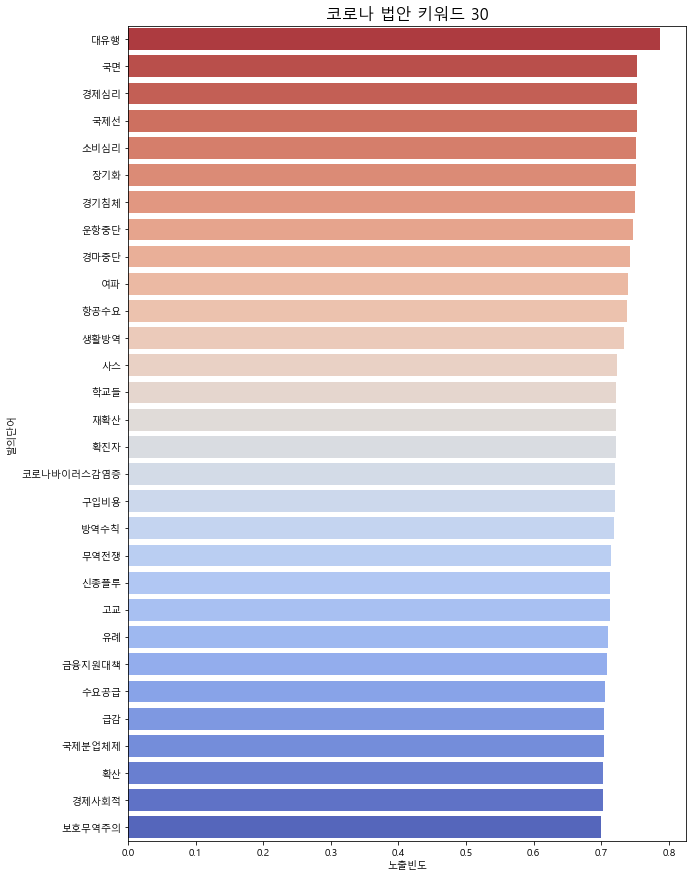

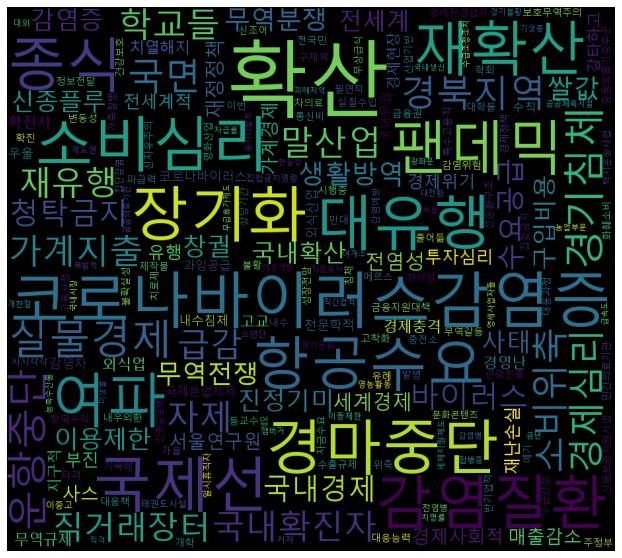

In [197]:
# 분석하고자 하는 발의의제에 대한 키워드 분석 후 데이터 프레임 리턴 
def get_billDetail(kywrd: str, select,cnt=30):
    tags_count_df = []
    try:
        if select == 1:
            tags_count_df.append(pd.DataFrame(model.most_similar(kywrd, topn = cnt)))
        else:
            tags_count_df.append(pd.DataFrame(model_dp.most_similar(kywrd, topn = cnt)))
            tags_count_df.append(pd.DataFrame(model_op.most_similar(kywrd, topn = cnt)))        
    except KeyError:
        tags_count_df = pd.DataFrame()
        print('존재하는 않는 키워드입니다.')
    except UnboundLocalError:
        print('예외 오류 발생')
    return tags_count_df
def show_billVisualization(df, kwrd, select, cnt):
    if select == '1':
        #tags_count_df.columns = ['발의단어', '노출빈도']
        df[0].columns = ['발의단어', '노출빈도']
        plt.figure(figsize = (10, 15))
        sns.barplot(x = '노출빈도', y = '발의단어', data = df[0], palette='coolwarm_r')
        plt.title('{} 법안 키워드 {}'.format(kwrd, cnt), fontsize=16)
    else:
        df[0].columns = ['발의단어', '노출빈도']
        plt.figure(figsize = (10, 15))
        sns.barplot(x = '노출빈도', y = '발의단어', data = df[0], palette='coolwarm_r')
        plt.title('{} 여당 법안 키워드 {}'.format(kwrd, cnt), fontsize=16)
        
        df[1].columns = ['발의단어', '노출빈도']
        plt.figure(figsize = (10, 15))
        sns.barplot(x = '노출빈도', y = '발의단어', data = df[1], palette='coolwarm_r')
        plt.title('{} 야당 법안 키워드 {}'.format(kwrd, cnt), fontsize=16)
def bill_main(kwrd: str, select, cnt=30):
    df = get_billDetail(kwrd, select, cnt)
    show_billVisualization(df,kwrd, select, cnt)
    show_wordCloud(kwrd)
if __name__ == "__main__":
    print("보여주기 옵션  : 1번 - 정당 상관없음 , 2번 - 여당/야당으로 보여주기.")
    select = input("보여주기 옵션 선택 : ")
    if len(select) < 1:
        print('선택해')
    else:
        keyword = input("입력하고 하는 법안키워드 :")
        cnt  = int(input("보여주고자 하는 키워드 수 : "))
        bill_main(keyword, select, cnt)

In [130]:
a_df = get_billDetail('코로나', 40)

In [131]:
a_df

,발의단어,노출빈도
0,확산,0.762523
1,코로나바이러스감염증,0.758400
2,경마중단,0.739062
3,소비심리,0.738014
4,대유행,0.733958
5,국제선,0.730446
6,장기화,0.730300
7,항공수요,0.725517
8,팬데믹,0.722964
9,감염질환,0.720019


In [94]:
rel_word = dict(model.most_similar('독점', topn = 30))

In [95]:
tags_count_df = pd.DataFrame(model.most_similar('독점', topn = 30))

In [96]:
tags_count_df.columns = ['발의단어', '노출빈도']

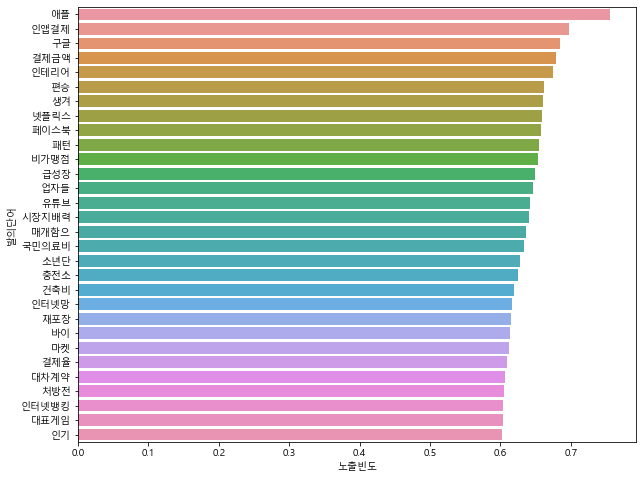

In [97]:
plt.figure(figsize = (10, 8))
sns.barplot(x = '노출빈도', y = '발의단어', data = tags_count_df)

In [44]:
rel_word

{'확산': 0.7625231742858887,
 '코로나바이러스감염증': 0.7584001421928406,
 '경마중단': 0.7390620708465576,
 '소비심리': 0.7380139827728271,
 '대유행': 0.7339582443237305,
 '국제선': 0.7304458618164062,
 '장기화': 0.7302996516227722,
 '항공수요': 0.725516676902771,
 '팬데믹': 0.7229644060134888,
 '감염질환': 0.7200190424919128,
 '여파': 0.7183862924575806,
 '종식': 0.7177754044532776,
 '재확산': 0.716162919998169,
 '실물경제': 0.7150459885597229,
 '경기침체': 0.7149436473846436,
 '운항중단': 0.711785078048706,
 '경북지역': 0.7065129280090332,
 '국면': 0.7060610055923462,
 '소비위축': 0.7050918340682983,
 '경제심리': 0.7049644589424133,
 '가계지출': 0.7019816637039185,
 '자제': 0.6982156038284302,
 '학교들': 0.696749210357666,
 '말산업': 0.6954467296600342,
 '국내확진자': 0.6953060626983643,
 '재유행': 0.6917768120765686,
 '급감': 0.6887920498847961,
 '직거래장터': 0.6866675615310669,
 '청탁금지': 0.6861529350280762,
 '바이러스': 0.6845632791519165}

In [39]:
rel_word.keys()

dict_keys(['확산', '코로나바이러스감염증', '경마중단', '소비심리', '대유행', '국제선', '장기화', '항공수요', '팬데믹', '감염질환', '여파', '종식', '재확산', '실물경제', '경기침체', '운항중단', '경북지역', '국면', '소비위축', '경제심리', '가계지출', '자제', '학교들', '말산업', '국내확진자', '재유행', '급감', '직거래장터', '청탁금지', '바이러스'])

In [40]:
rel_word.values()

dict_values([0.7625231742858887, 0.7584001421928406, 0.7390620708465576, 0.7380139827728271, 0.7339582443237305, 0.7304458618164062, 0.7302996516227722, 0.725516676902771, 0.7229644060134888, 0.7200190424919128, 0.7183862924575806, 0.7177754044532776, 0.716162919998169, 0.7150459885597229, 0.7149436473846436, 0.711785078048706, 0.7065129280090332, 0.7060610055923462, 0.7050918340682983, 0.7049644589424133, 0.7019816637039185, 0.6982156038284302, 0.696749210357666, 0.6954467296600342, 0.6953060626983643, 0.6917768120765686, 0.6887920498847961, 0.6866675615310669, 0.6861529350280762, 0.6845632791519165])